# Analysis of 'Drinking water potability' dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#DOWNGRADE NUMPY TO 1.23 conflict with seaborn version of numpy 1.24
#pip install --upgrade  numpy==1.23
#Then reboot project

In [4]:
water = pd.read_csv('dataset/drinking_water_potability.csv')

## EDA Analysis

 Typically, using EDA we try to get the answer to the following questions:

1. What kind of data is this? (file format, volume of data, number of columns, metadata data of image/video/audio or some feedback in English or other languages, or tabular data, etc)

2. How complex is this data? (How many files are there? primary key? how these files are connected to each other? is nested data in some files? is some field having nested data, etc.)

3. Is this data sufficient for meeting our ultimate goal, i.e. Model building?

4. Is there any missing data? Data needed but not given by the business or not available at all or costly to get that data etc.

5. Are there any missing values? In the given dataset do we have complete information or some values are missing for some records or some columns?

6. Is there any relationship between different independent variables of the dataset? If yes then how strong is that relationship?

7. Are observations independent or tightly coupled?



In [3]:
#Describing the type of variables
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [55]:
#Counting the number of missing values
water.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [21]:
#Obtaining an overview of the dataset
water.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

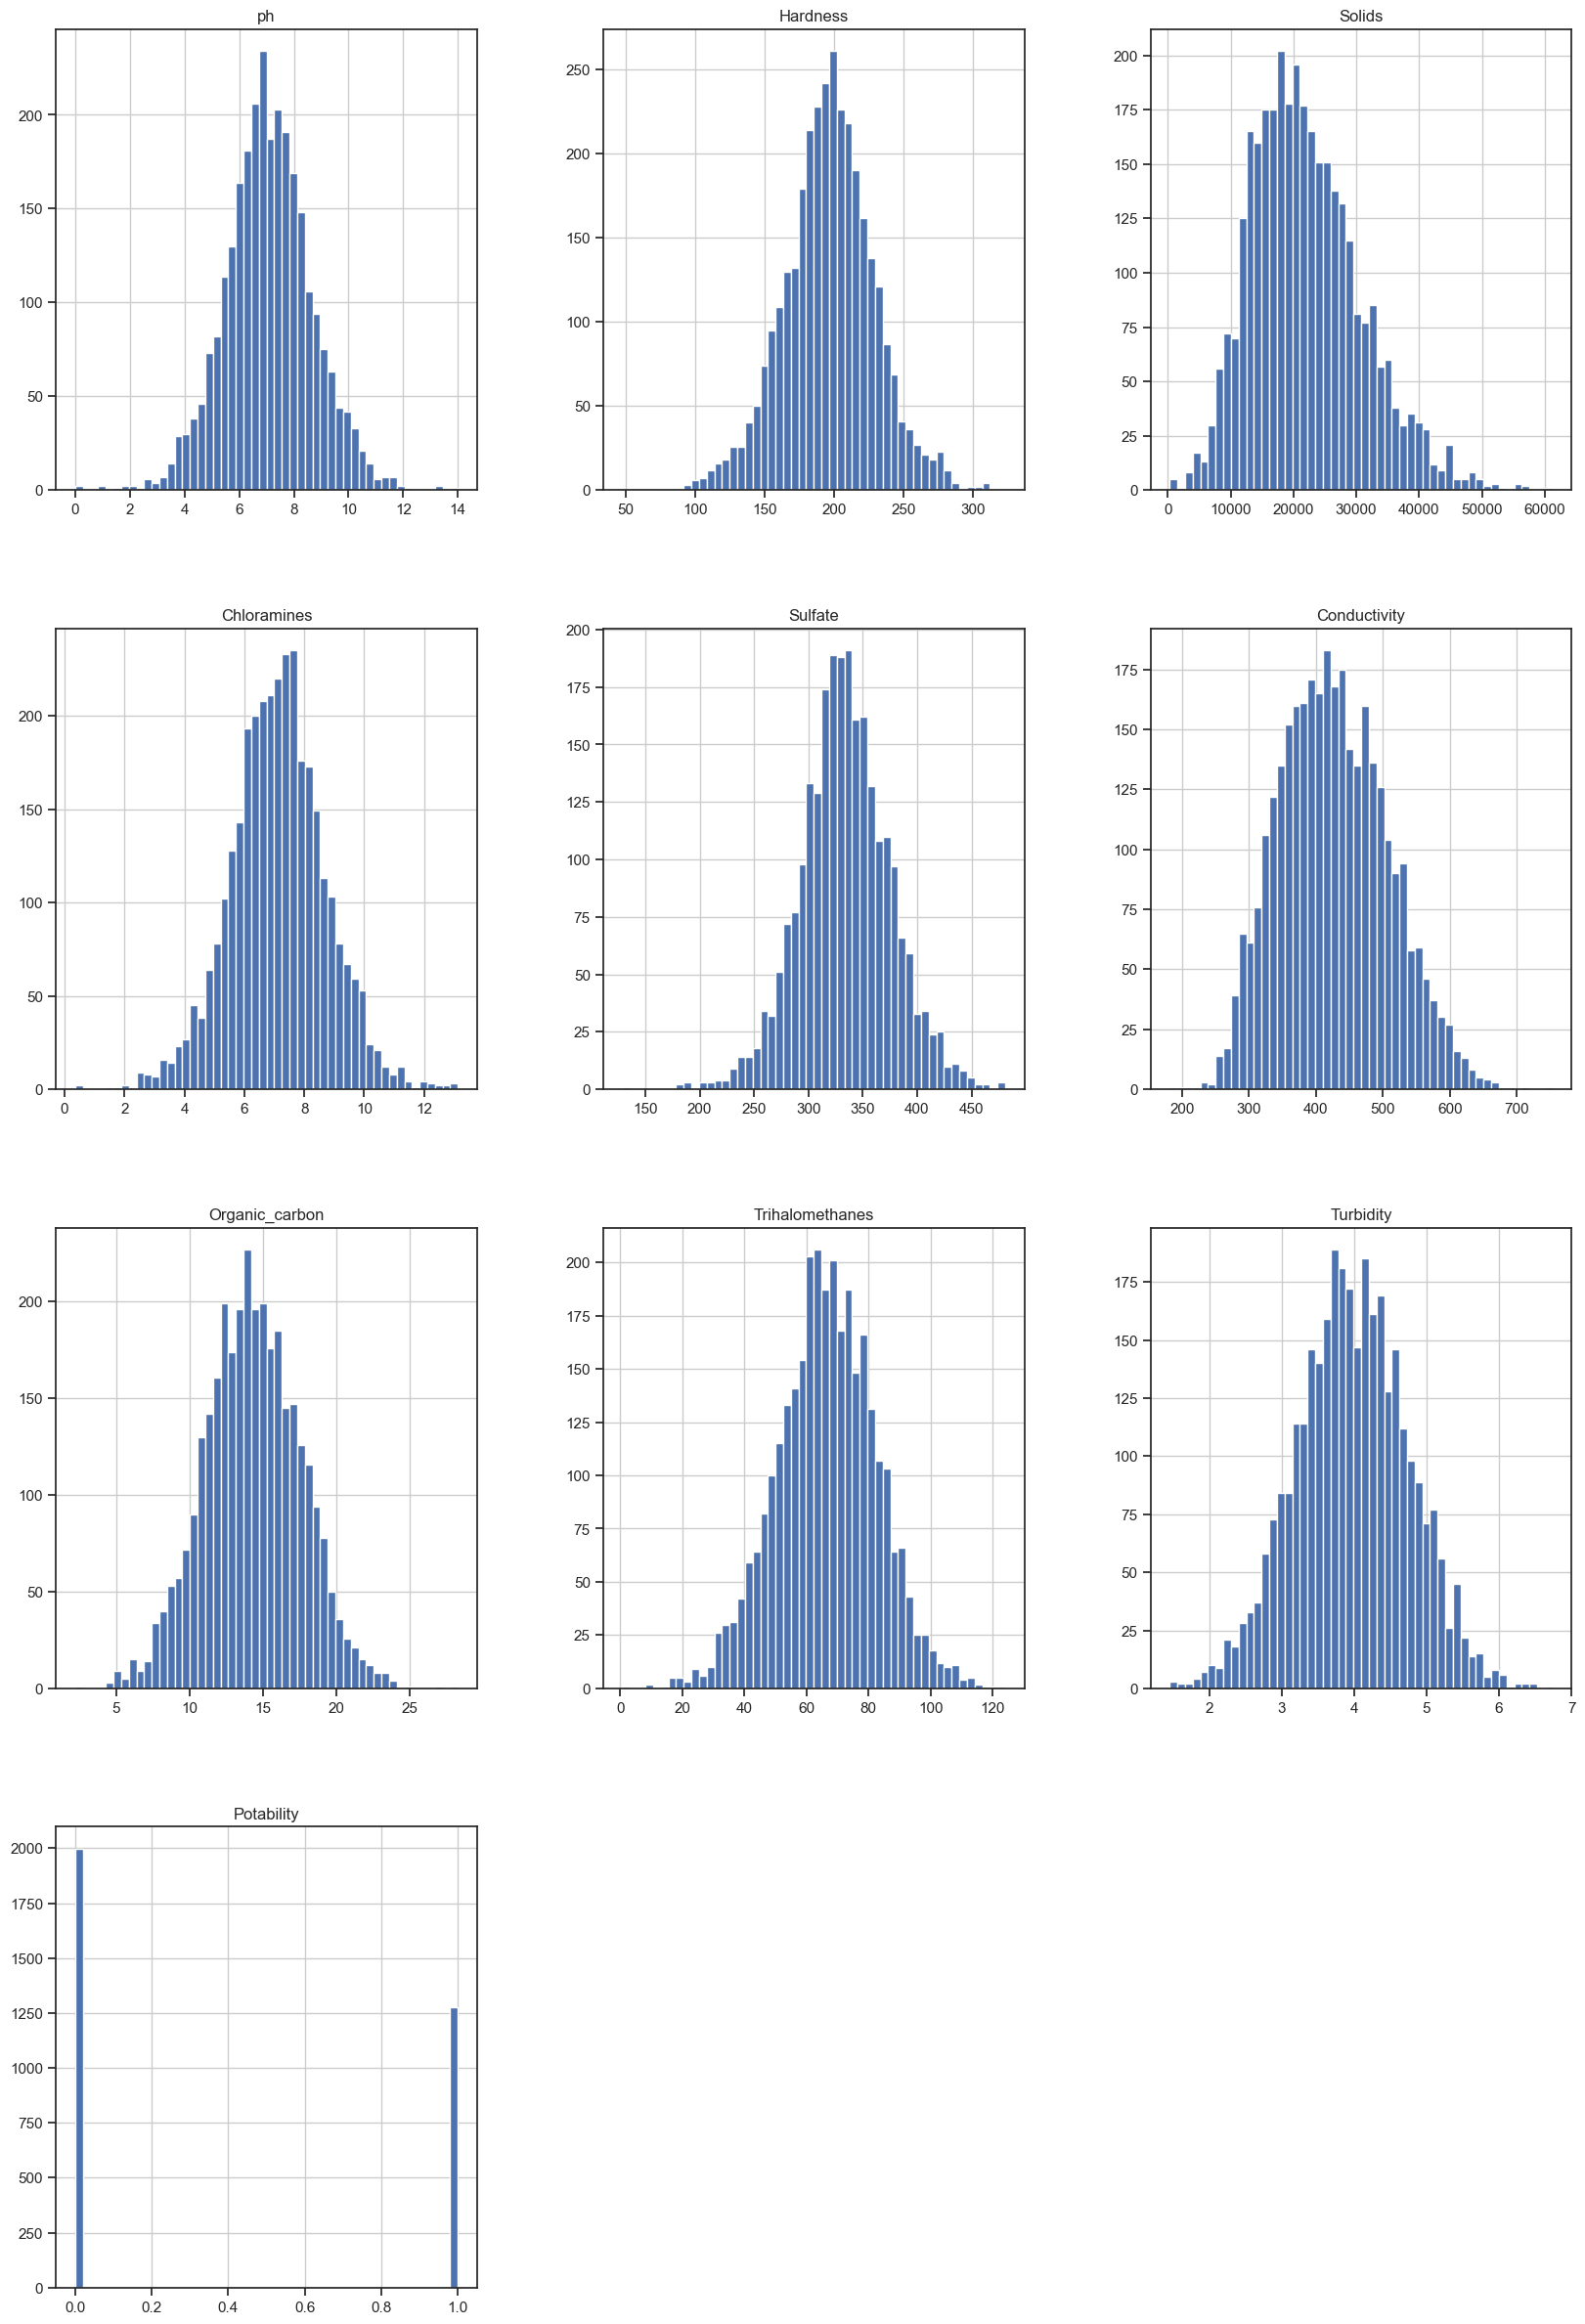

In [10]:
#Histograms
water.hist(bins=50,figsize=(20,30))
plt.show()

In [11]:
# not useful because i have used the other function
'''
colwater=water.columns
colwater=colwater[1:9]

for  i in colwater:
    sns.displot(data=water, x=i,hue='Potability', kind='kde',
    palette=sns.color_palette('bright')[:2],height=4, aspect=1.5)
    plt.show()

'''


"\ncolwater=water.columns\ncolwater=colwater[1:9]\n\nfor  i in colwater:\n    sns.displot(data=water, x=i,hue='Potability', kind='kde',\n    palette=sns.color_palette('bright')[:2],height=4, aspect=1.5)\n    plt.show()\n\n"

<AxesSubplot: >

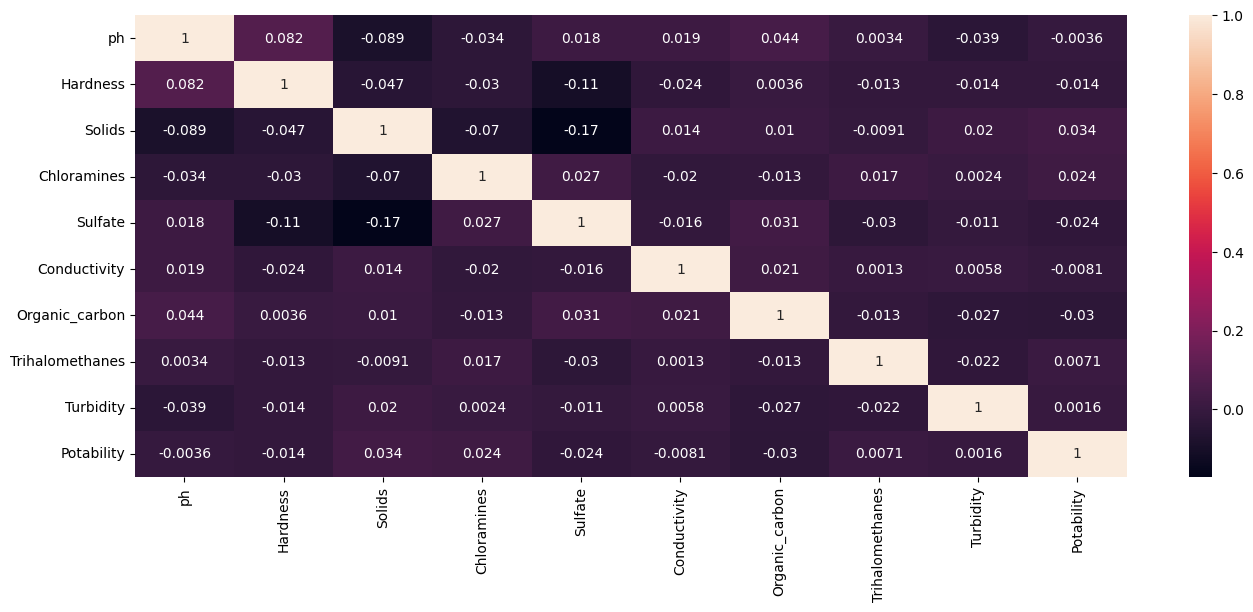

In [10]:
#Correlation Matrix
plt.figure(figsize=(16, 6))
sns.heatmap(water.corr(),annot=True)

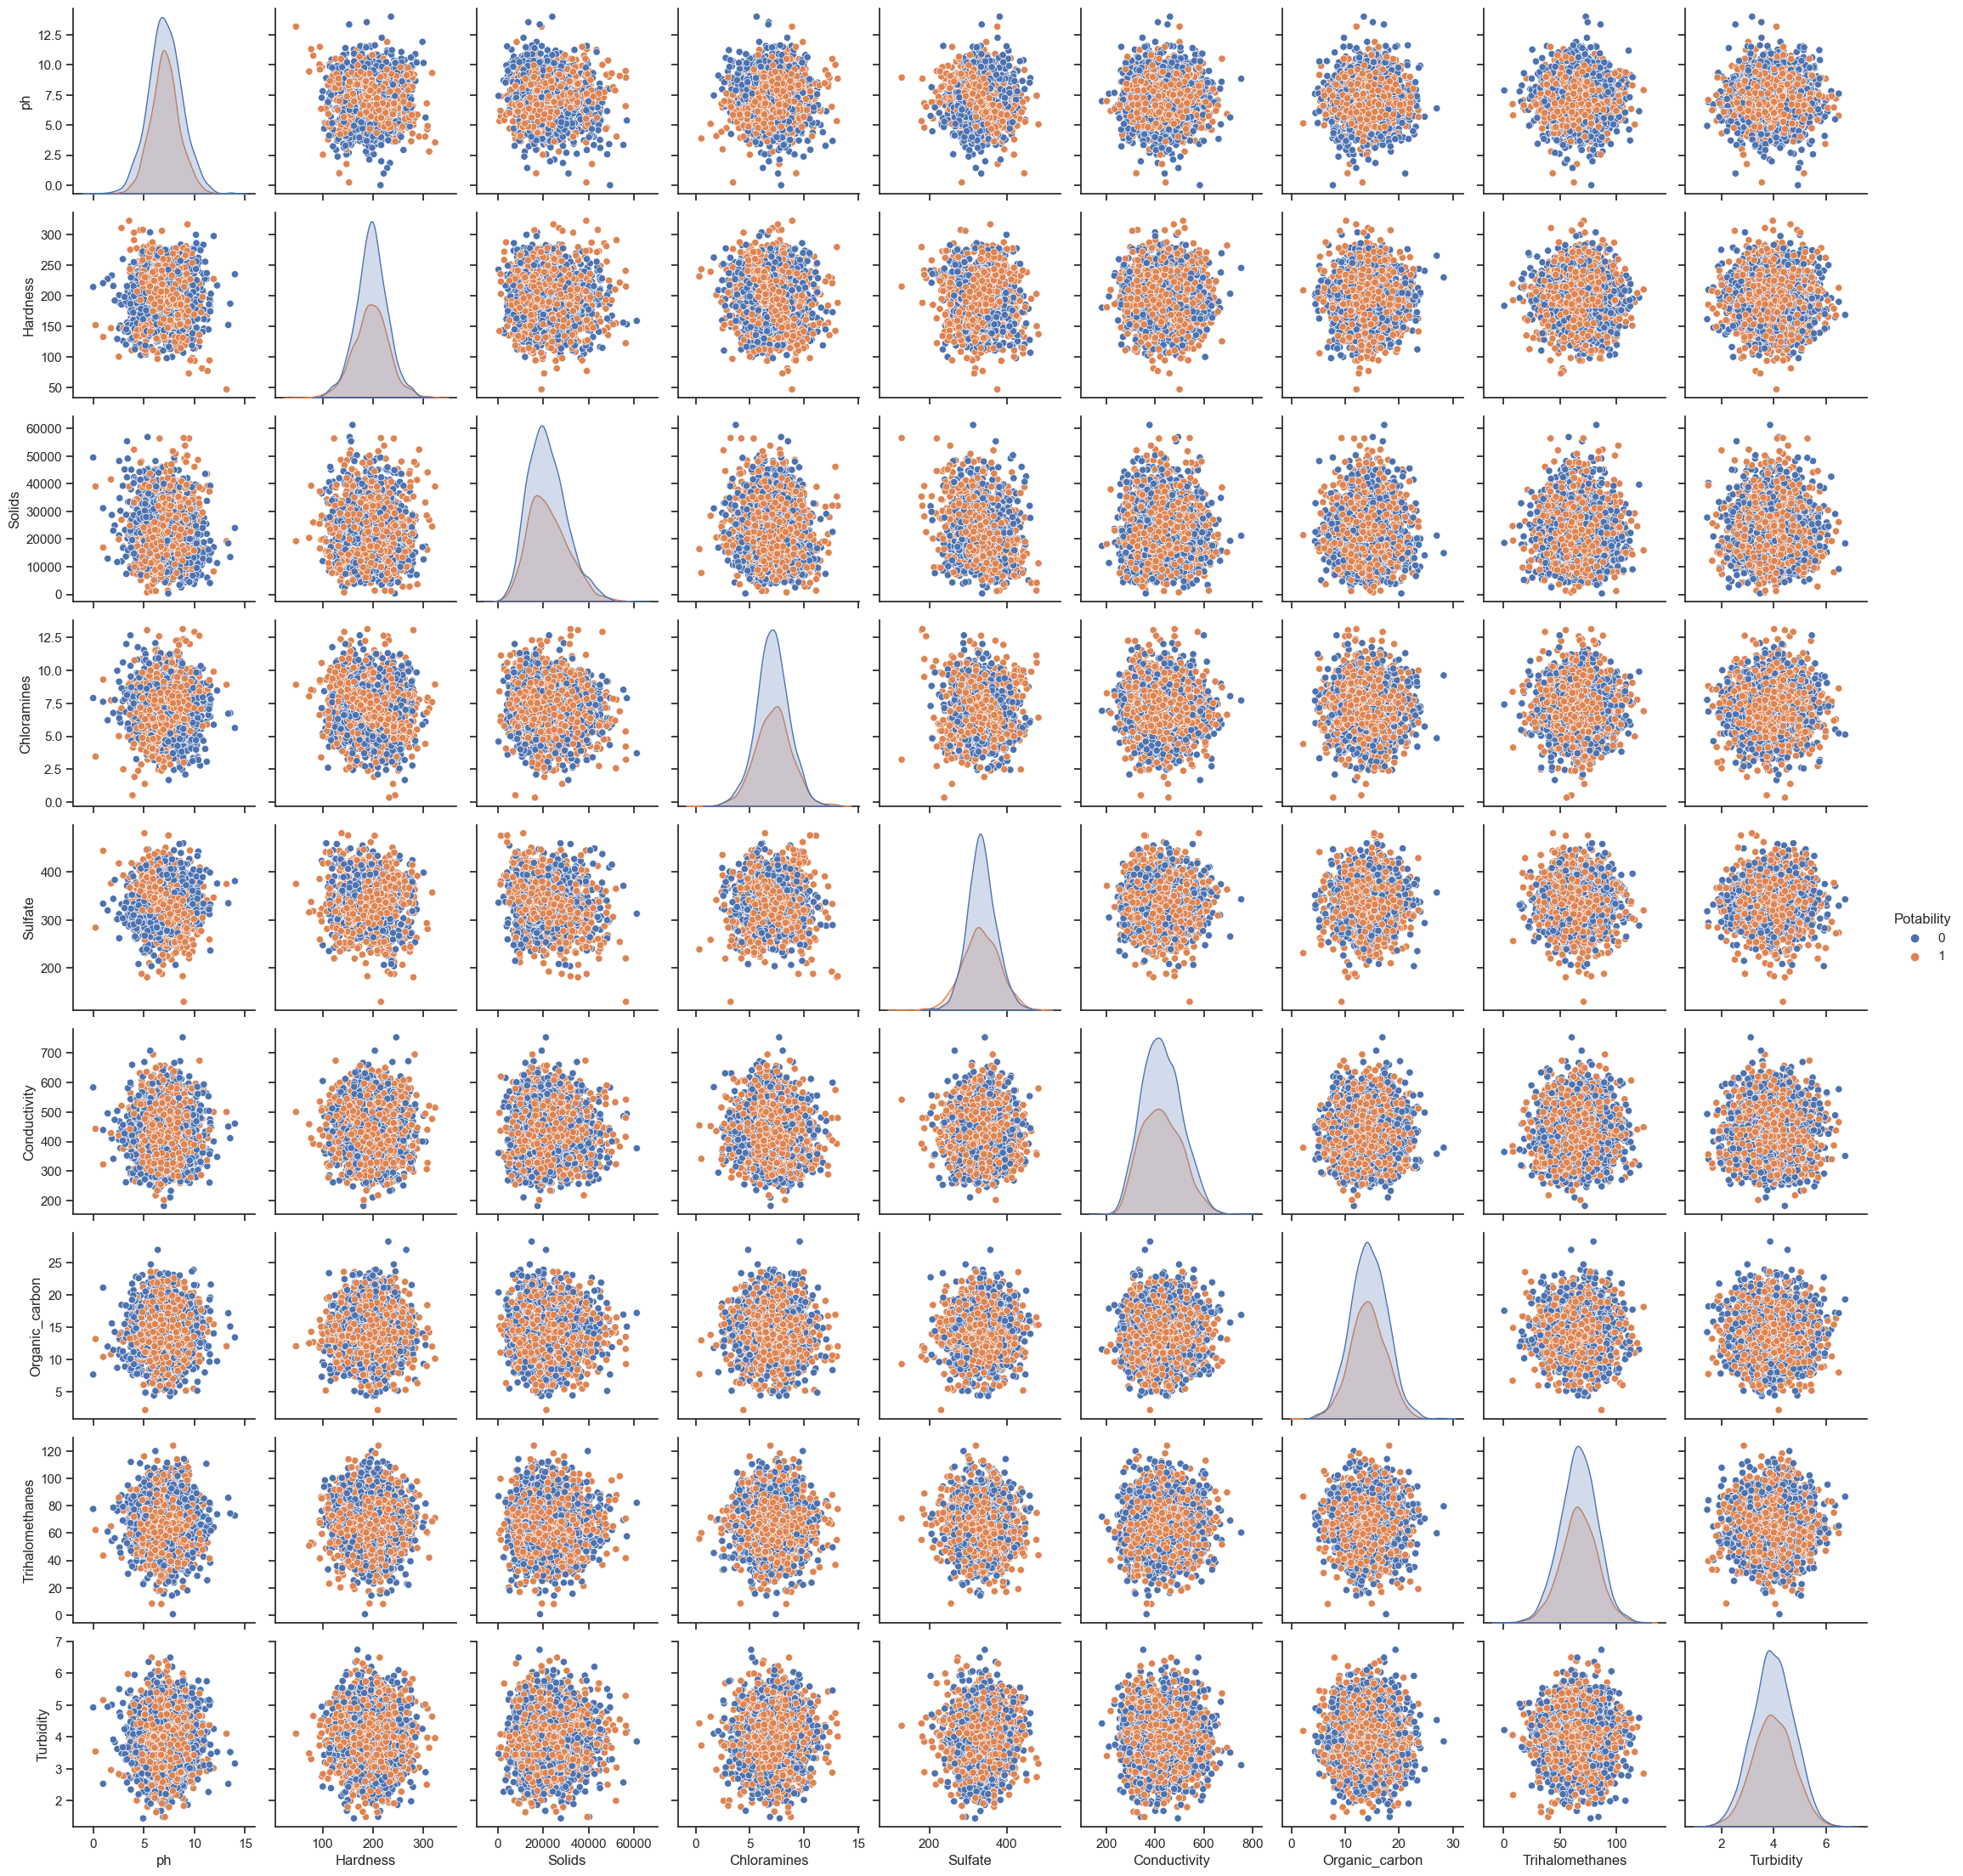

In [9]:
#PairPlot with splitted Distributions
sns.set_theme(style="ticks")
sns.pairplot(water, hue="Potability")
plt.show()

## Data Cleaning 

We have determined what type of cleaning is required, what needs to be cleaned, and so on. At this stage, we will decide what needs to be cleaned and how that cleaning can be accomplished. This is referred to as Data Preprocessing.

Sample tasks of Data Preprocessing include:

1. If the data has html tags then remove it.

2. If data contains Null values then impute it.

3. If the data has some irrelevant features then drop it

4. If the data has some abbreviation then replace it.

5. If the data has stop words then remove it.



## Feature Engineering

Feature Engineering is known as the process of transforming raw data (that has already been processed by Data Engineers) into features that better represent the underlying problem to predictive models, resulting in improved model accuracy on unseen data.

Sample tasks of Feature Engineer include:

1. See if mean, median, percentiles could likely improve the current model accuracy.

2. In the case of images see whether grayscale could be helpful.

3. Check whether the model performance could be increased using frequencies.
